<a href="https://colab.research.google.com/github/mprksa/DT/blob/main/DTxTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Clone the repository
!git clone https://github.com/mprksa/DT.git

Cloning into 'DT'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (337/337), done.
remote: Total 340 (delta 28), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (340/340), 342.22 MiB | 24.91 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [3]:
# Path to the image directory
image_dir = '/content/DT'

In [4]:
# Define the colors and their labels
colors = ['Biru', 'Hijau', 'Kuning', 'Merah', 'Ungu']
labels = {'Biru': 0, 'Hijau': 1, 'Kuning': 2, 'Merah': 3,  'Ungu': 4}

In [5]:
# Define HSV min-max ranges for filtering
min_max_values = {
    'Biru': {'min': np.array([99.196074, 99.813478, 83.155714]), 'max': np.array([104.685289, 219.723198, 238.569194])},
    'Hijau': {'min': np.array([48.861155, 105.479812, 86.209898]), 'max': np.array([74.760818, 181.236951, 222.063025])},
    'Kuning': {'min': np.array([23.988905, 97.599982, 97.338174]), 'max': np.array([29.850039, 240.684835, 235.650069])},
    'Merah': {'min': np.array([1.293470, 142.020592, 91.763768]), 'max': np.array([176.704975, 233.287396, 240.474074])},
    'Ungu': {'min': np.array([153.704228, 138.603139, 93.157067]), 'max': np.array([167.345930, 220.801643, 239.349195])},
}

In [6]:
# Initialize arrays for HSV values and labels
hsv_values = []
color_labels = []

# Process each image in the directory
for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Calculate average HSV
        avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)

        # Filter based on HSV range
        if all(min_max_values[color]['min'] <= avg_hsv) and all(avg_hsv <= min_max_values[color]['max']):
            hsv_values.append(avg_hsv)
            color_labels.append(labels[color])

hsv_values = np.array(hsv_values)
color_labels = np.array(color_labels)

In [7]:
# Print number of images per class after filtering
num_images_per_class = {color: color_labels.tolist().count(labels[color]) for color in colors}
print("Jumlah gambar yang dilatih per kelas setelah penyaringan:")
print(num_images_per_class)

Jumlah gambar yang dilatih per kelas setelah penyaringan:
{'Biru': 42, 'Hijau': 45, 'Kuning': 49, 'Merah': 83, 'Ungu': 49}


In [8]:
# Calculate and display HSV statistics
hsv_df = pd.DataFrame(hsv_values, columns=['H', 'S', 'V'])
hsv_df['label'] = color_labels

for label, color in labels.items():
    class_stats = hsv_df[hsv_df['label'] == color].describe().loc[['min', 'max', 'mean']]
    print(f"Statistik HSV untuk kelas {label}:")
    print(class_stats)

Statistik HSV untuk kelas Biru:
               H           S           V  label
min    99.431577   99.813478   83.155714    0.0
max   104.685174  219.723198  238.322157    0.0
mean  103.052534  176.981192  187.551436    0.0
Statistik HSV untuk kelas Hijau:
              H           S           V  label
min   48.861155  105.719915   86.633002    1.0
max   74.679439  181.070768  221.272607    1.0
mean  56.889888  129.041432  177.874907    1.0
Statistik HSV untuk kelas Kuning:
              H           S           V  label
min   23.988905   97.599982   97.338174    2.0
max   29.850039  240.684835  235.576130    2.0
mean  26.305819  173.774150  196.518644    2.0
Statistik HSV untuk kelas Merah:
               H           S           V  label
min     1.301895  142.020592   91.763768    3.0
max   176.704975  228.916023  240.474074    3.0
mean   44.247668  184.665296  174.201921    3.0
Statistik HSV untuk kelas Ungu:
               H           S           V  label
min   153.704228  138.603139

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hsv_values, color_labels, test_size=0.2, random_state=60)

In [10]:
# Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Predict labels on the test set
y_pred = model.predict(X_test)

In [12]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 100.00%


In [13]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=colors))

Classification Report:
              precision    recall  f1-score   support

        Biru       1.00      1.00      1.00        10
       Hijau       1.00      1.00      1.00        10
      Kuning       1.00      1.00      1.00         7
       Merah       1.00      1.00      1.00        14
        Ungu       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



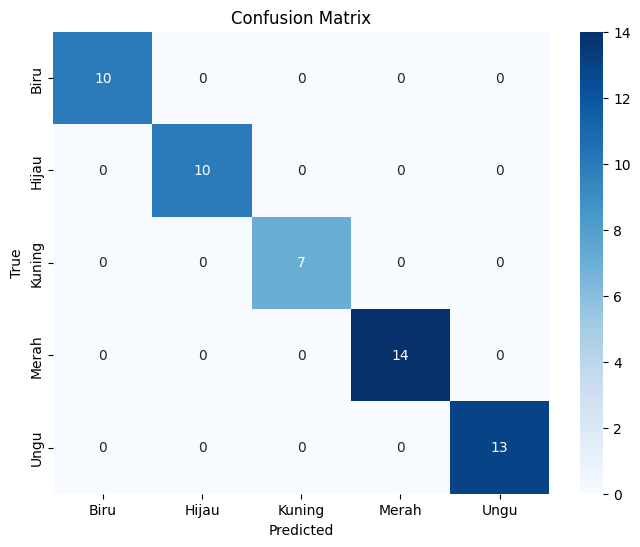

In [14]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=colors, yticklabels=colors, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

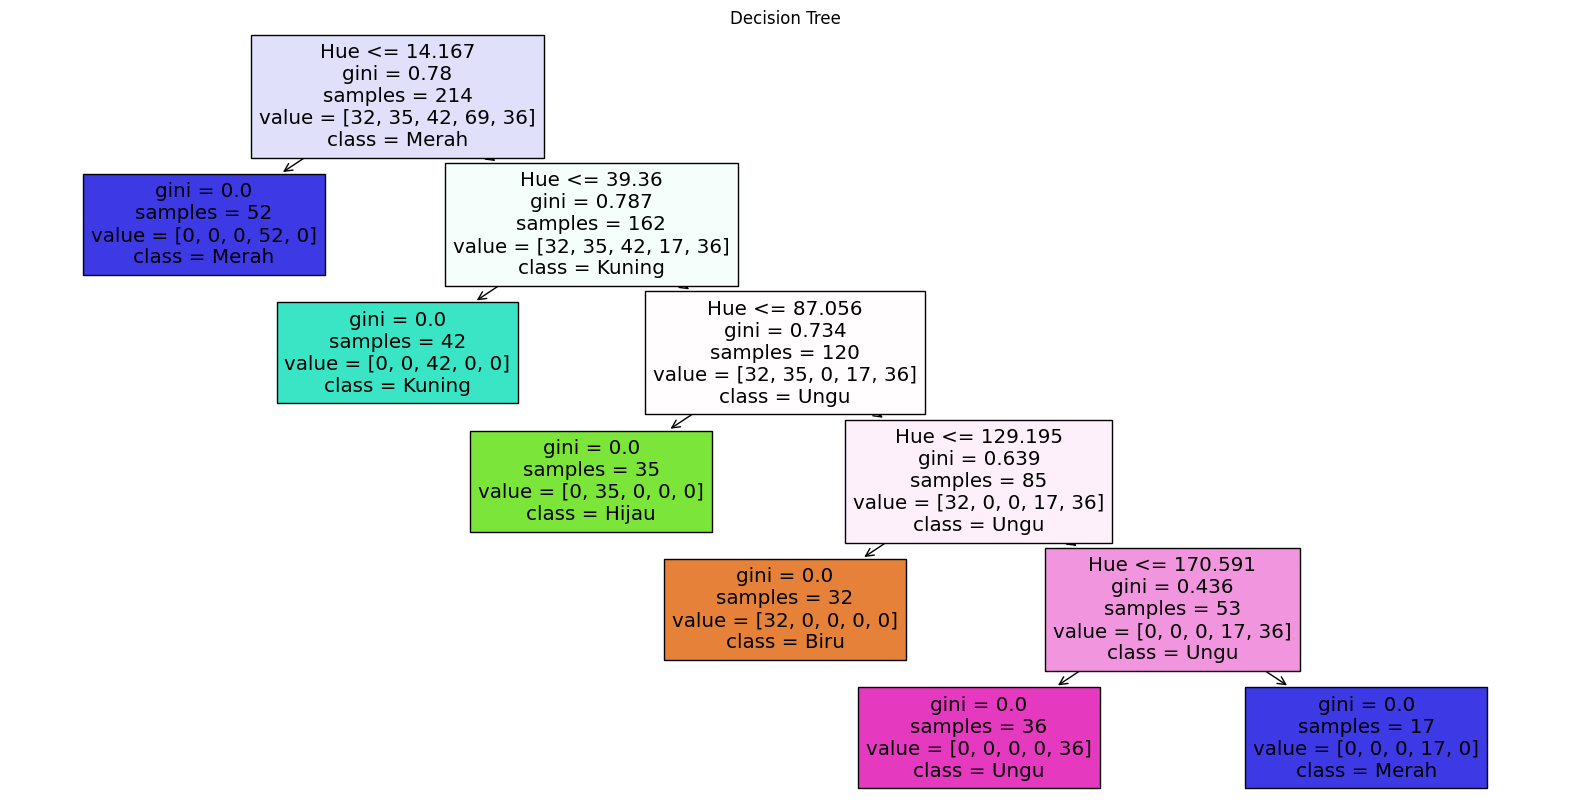

In [15]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['Hue', 'Saturation', 'Value'], class_names=colors, filled=True)
plt.title('Decision Tree')
plt.show()